# Problem Set 4
##### Serena Flint

### Problem 1

error  [7.6414941e-10]


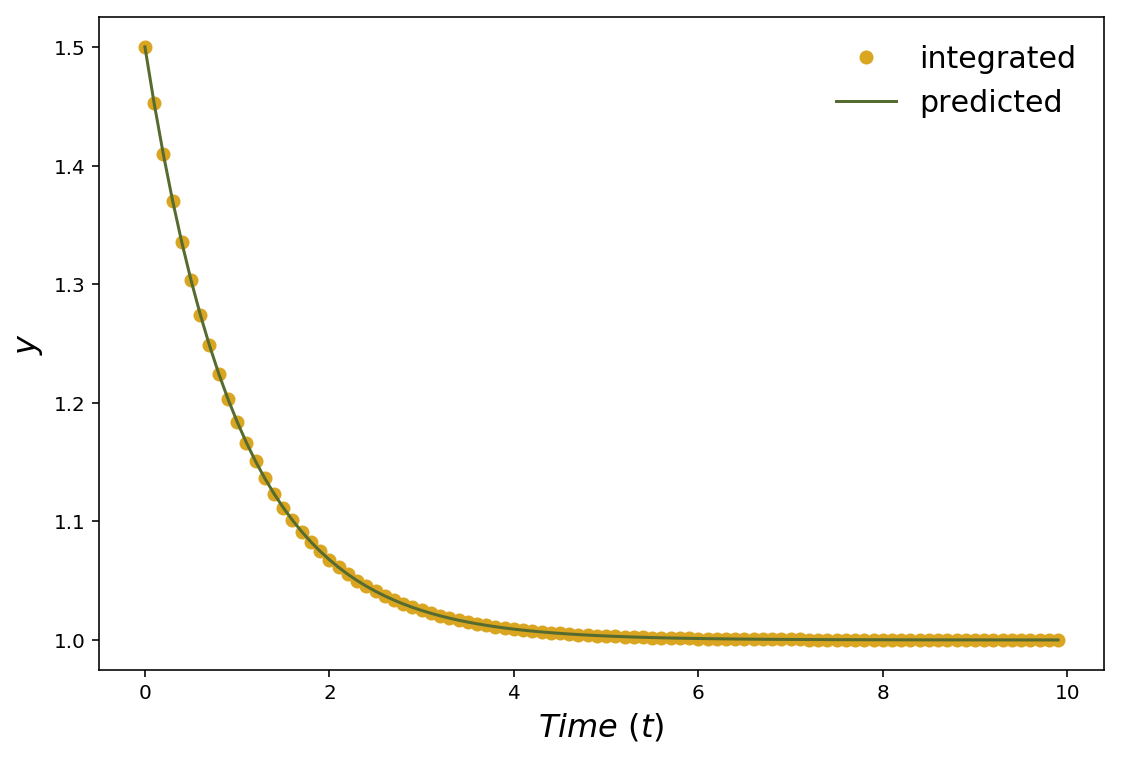

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#initial condition
y0 = 1.5
# parameter of equation
a=0.3  # is a global variable

# Set up time grid for  integration
tmax=10.0;
dt = 0.1;
tt = np.arange(0,tmax,dt);  # the time vector
# this is a list of times.  odeint will return solutions at these times

# our ordinary differential equation
def func(y,t):  # equation for motion! this is dy/dt
    return (1.0-y)

# solve the ordinary differential equation
yy=odeint(func,y0,tt)  # func is our function, y0 is initial condition, 
# tt a time vector
# yy is now a vector yy values computed by integrating the equation
# we will have a y value at each time in the vector yy

# plot the predicted analytical solution on top of the integrated solution
ysol = (0.5*np.exp(-tt))+1   # vector of y values predicted
plt.figure(figsize=(9,6))
plt.plot(tt,yy,'o',color = 'goldenrod',label="integrated")  # plot the ingegrated thing as points
plt.plot(tt,ysol,'-',color = 'darkolivegreen',label="predicted")  # plot the analytical solution as a line
plt.xlabel("$Time \ (t)$",fontsize=16)  # make nice labels!
plt.ylabel("$y$",fontsize=16)
plt.legend(loc='best',frameon=False,fontsize=15)  # legend

# how well did the integration do?
print ('error ', yy[-1] - ysol[-1]);  # difference at the end

##### Part 2
Original Equation: $\frac{dy}{dt}=1-y$

Since this is an easy 1st order linear ODE, we easily can use separation of variables or the integrating factor method. My favorite method is with integrating facotrs, so I'll continue with this method.

First, we need to put our equation into the form $\frac{dy}{dt} + p(t)y = q(t)$, which in this case $p(t) = 1$ and $q(t) = 1$. 

From here, we can find our integrating factor from the form $e^{\int p(t)dt}$, which returns an integrating factor of $e^{t}$ in our case.

With this, we can multiple each side by $e^{t}$ and using knowledge of the chain rule we can replace $\frac{dy}{dt} (e^{t} y)$ with $e^{t}(\frac{dy}{dt}+y) \ $. This gives us the equation $\frac{dy}{dt} (e^{t} y) \ = \ e^{t}$.

After integrating both sides we get $e^{t} y \ = \ e^{t} + C$, where we can easily solve for y. 

Our resulting equation and solution is then $y \ = \ C e^{-t} + 1$.

To find the value of C, we take our initial condition of $y(0)=1.5$ (set as y0 in the code), and solve for C. With this we find the solution to be $y \ = \ 0.5 e^{-t} + 1$

##### Part 4

$\alpha = \frac{a}{b}$

$\beta = \frac{1}{b}$

### Problem 2

In [21]:
# solution
class Eulerf():
    def __init__(self,f,dt,y0):  # construct/create 
        self.f = f    # function of one variable!
        self.dt = dt  # timestep
        self.y0 = y0  # store initial x0
        self.y = y0   # initial condition
        self.t = 0.0  # initial time
        self.tarr = [self.t] # array to store times
        self.yarr = [y0]     # array to store y values
        # Putting initial conditions into these arrays
        
    # reset to initial conditions
    def reset(self):
        self.y = self.y0  # reset initial conditions
        self.t = 0.0
        self.tarr = [self.t]  #reset arrays too
        self.yarr = [y0] 
    
    # integrate from t to t+dt, add results to arrays
    def take_one_step(self):
        self.yarr[self.t+self.dt] = self.yarr[self.t]+self.dt*self.f(yarr[self.t])
        
        self.tarr = np.append(self.tarr,self.t)  # append to arrays
        self.yarr = np.append(self.yarr,self.y)
    
    # take n integration steps (integrate from t to t+n*dt)
    # update arrays with each timestep
    def integrate_nsteps_n(self,n):
        self.yarr[self.t]= self.y0
        self.tarr = np.linspace(0., n, int(n/self.dt)+1)
        for i in range(1, len(tarr)):
            self.yarr[i] = self.yarr[i-1]+self.f(yarr[i-1])*self.dt
       
            
    def integrate_t1(self,t1):  # integrate to t1
        n = int(t1/dt)  # not exactly equal to t1!
        for i in range(n):
            self.take_one_step()
            
    def ret_arrays(self):
        return self.tarr,self.yarr  # return the arrays!
    
func = lambda t: t^2
print(Eulerf.integrate_nsteps_n(func,10))

AttributeError: 'function' object has no attribute 'y0'

It's 11:56PM and I don't have time to fix this :(
Was busy all weekend with the hackathon and ran out of time.

### Problem 3

(-4, 7)

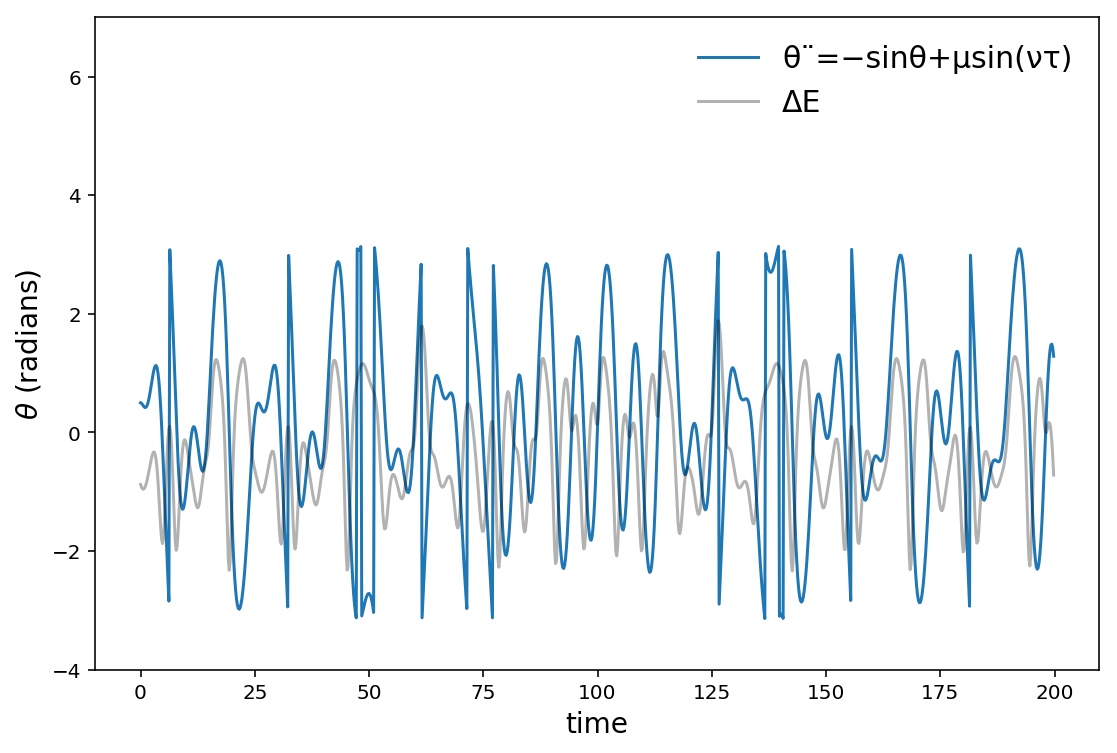

In [19]:
# example, integrating with odeint the pendulum
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#initial condition
theta0 = 0.5;
dot_theta0=0.0;
y0 = [theta0,dot_theta0] # initial state vector

tmax=200.0;   # maximum time integrated
dt = 0.2;  # distance between times in the time vector
tt = np.arange(0,tmax,dt);  # the time vector
# this is a list of times where we want to know the solution

nu = 0.97
mu = 0.96
# equation of motion! 
# here gammas is a parameter that could be used by this function
def func(y,t,gammas):  # this returns dy/dt
    theta = y[0]  #from our state vector
    dottheta=y[1]
    return [dottheta,-np.sin(theta)+mu*np.sin(nu*t)] # return dy/dt 
# you will need to modify this routine for the perturbed pendulum


gammas=0; parms=(gammas,)    # this is a tuple of parameters
# how to pass additional parameters to our integration function!

# solve the ordinary differential equation
yy=odeint(func,y0,tt,args=parms,atol=1e-125,rtol=1e-12)  
# func is our function, y0 is initial condition, tt a time vector
# yy is now a vector of yy values computed by integrating the equation
# rtol, atol let you adjust the precision of the integration
# parms are the parameters sent to the function

thetaarr = yy[:,0] # the array of theta outputs
thetaarr = ( (thetaarr + np.pi)%(2*np.pi) - np.pi ) #trying to keep things between -pi and pi
dotthetaarr = yy[:,1]  # the array of dot theta outputs (needed to compute Kinetic energy)

K = 0.5*dotthetaarr
U = -np.cos(thetaarr)

E = U + K

#print(E)

plt.figure(figsize=(9,6))
plt.plot(tt,thetaarr, label = 'θ¨=−sinθ+μsin(ντ)')  # plot theta(tau)
plt.xlabel('time',fontsize=14);
plt.ylabel(r'$\theta$ (radians)',fontsize=14);
plt.plot(tt, E, 'k-', alpha = 0.3, label = 'ΔE')
plt.legend(loc='best',frameon=False,fontsize=15)  # legend
plt.ylim(-4,7)

##### Part 1

$a = \omega_{0}$

##### Part 2

See above code output and graph.